In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

C:\Users\Loki\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import string
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [11]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['feature_engineering (1).csv']))

In [11]:
df=pd.read_csv(r'C:\Users\Loki\Downloads\fake_job\feature_engineering.csv')

# New Section

In [12]:
df.head(2)

,Unnamed: 0,job_id,title,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,...,description_d,company_profile_d,requirements_d,benefits_d,length_description,length_company_profile,length_requirements,length_benefits,Minimum_salary_range,Maximum_salary_range
0,0,1,Marketing Intern,Marketing,0,1,0,2,2,-1,...,"['food', 'fast', 'growing', 'james', 'beard', ...","['food', 'weve', 'created', 'groundbreaking', ...","['experience', 'content', 'management', 'syste...",['Unspecified'],90,90,75,1,1,3
1,1,2,Customer Service - Cloud Video Production,Success,0,1,0,5,-1,-1,...,"['organised', 'focused', 'vibrant', 'awesomedo...","['second', 'world', 'cloud', 'video', 'product...","['expect', 'youyour', 'key', 'responsibility',...","['get', 'usthrough', 'part', 'second', 'team',...",97,97,121,108,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              17880 non-null  int64 
 1   job_id                  17880 non-null  int64 
 2   title                   17880 non-null  object
 3   department              17880 non-null  object
 4   telecommuting           17880 non-null  int64 
 5   has_company_logo        17880 non-null  int64 
 6   has_questions           17880 non-null  int64 
 7   employment_type         17880 non-null  int64 
 8   required_experience     17880 non-null  int64 
 9   required_education      17880 non-null  int64 
 10  industry                17880 non-null  object
 11  function                17880 non-null  object
 12  fraudulent              17880 non-null  int64 
 13  Country                 17880 non-null  object
 14  State                   17880 non-null  object
 15  Ci

In [13]:
df['text']=df['title']+' '+df['department']+' '+df['industry']+' '+df['function']+' '+df['State']+' '+df['City']+' '+df['Country']+' '+df['description_d']+' '+df['company_profile_d']+' '+df['requirements_d']+' '+df['benefits_d']

In [15]:
df.shape

(17880, 16)

In [14]:
df.drop(columns=['title','department','industry','function','State','City','Country','description_d','company_profile_d','requirements_d','benefits_d'],inplace=True)

In [16]:
df.head(2)

,Unnamed: 0,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,length_description,length_company_profile,length_requirements,length_benefits,Minimum_salary_range,Maximum_salary_range,text
0,0,1,0,1,0,2,2,-1,0,90,90,75,1,1,3,Marketing Intern Marketing unspecified Marketi...
1,1,2,0,1,0,5,-1,-1,0,97,97,121,108,1,3,Customer Service - Cloud Video Production Succ...


In [17]:
df.drop(columns=['length_description','length_company_profile','length_requirements','length_benefits'],inplace=True)


In [18]:
df.shape

(17880, 12)

In [19]:
df.drop(columns=['Unnamed: 0','job_id'],inplace=True)

In [20]:
df.shape

(17880, 10)

In [21]:
df['char_length']=df['text'].apply(len)
df['word_length']=df['text'].apply(lambda x: len(x.split()))
df['word_density']=(df['char_length']/df['word_length'])

In [ ]:
df.head(2)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,Minimum_salary_range,Maximum_salary_range,text,char_length,word_length,word_density
0,0,1,0,2,2,-1,0,1,3,Marketing Intern Marketing unspecified Marketi...,2825,259,10.907336
1,0,1,0,5,-1,-1,0,1,3,Customer Service - Cloud Video Production Succ...,5884,532,11.060150


In [ ]:
tf_idf=TfidfVectorizer(ngram_range=(1,3))
tf=tf_idf.fit_transform(df['text'])
tf.shape

(17880, 2910985)

There were a lot of columns after tf-idf vectorization, so restrictions the columns size

In [19]:

n_features = {
    "text" : 10000
    }


In [20]:
for c,i in n_features.items():
    tf_idf=TfidfVectorizer(max_features=i,ngram_range=(1,3))
    tf_idf.fit(df[c])
    train_tf_idf=np.array(tf_idf.transform(df[c]).toarray(),dtype=np.float16)
    
    for i in range(n_features[c]):
        df[c+"_tf_idf"+str(i)]=train_tf_idf[:,i]
    
    

In [21]:
df.shape

(17880, 10013)

In [22]:
df=pd.read_csv(r'C:\Users\Loki\Downloads\fake_job\modeling_evaluation.csv')

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
x=df.drop(columns=['fraudulent','text'])
y=df['fraudulent']
X_train ,X_test  ,y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

In [25]:
print(X_train.shape,y_train.shape)

(14304, 10012) (14304,)


In [26]:
print(X_test.shape,y_test.shape)

(3576, 10012) (3576,)


# Logistic Regression 

In [27]:
def train_test_(classifier, x_train_, y_train_, x_test_,y_test_):
    classifier.fit(x_train_,y_train_)
    
    predictions=classifier.predict(x_test_)
    
    return metrics.accuracy_score(predictions,y_test_)

In [28]:
scaler=MinMaxScaler(feature_range=(0,1))

X_train_scaled=scaler.fit_transform(X_train)


In [29]:
X_test_scaled=scaler.transform(X_test)

In [29]:
predicted_scaled_log=train_test_(LogisticRegression(verbose=1),X_train_scaled,y_train,X_test_scaled,y_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s finished


In [30]:
print(predicted_scaled_log)

0.9848993288590604


In [31]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
parametes={
        "C":[0.01,0.1,1,10,100],
        "penalty":['l2','l1']
}

In [37]:
grid_search_log=GridSearchCV(estimator=LogisticRegression(),param_grid=parametes,cv=5,verbose=1).fit(X_train_scaled,y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 pena

In [38]:
grid_search_log.best_params_

{'C': 10, 'penalty': 'l2'}

In [39]:
predicted_scaled_log=train_test_(LogisticRegression(C=10,penalty='l2'),X_train_scaled,y_train,X_test_scaled,y_test)


In [40]:
print(predicted_scaled_log)

0.9862975391498882


# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [49]:
Decision_tree_=DecisionTreeClassifier()
d=Decision_tree_.fit(X_train,y_train)

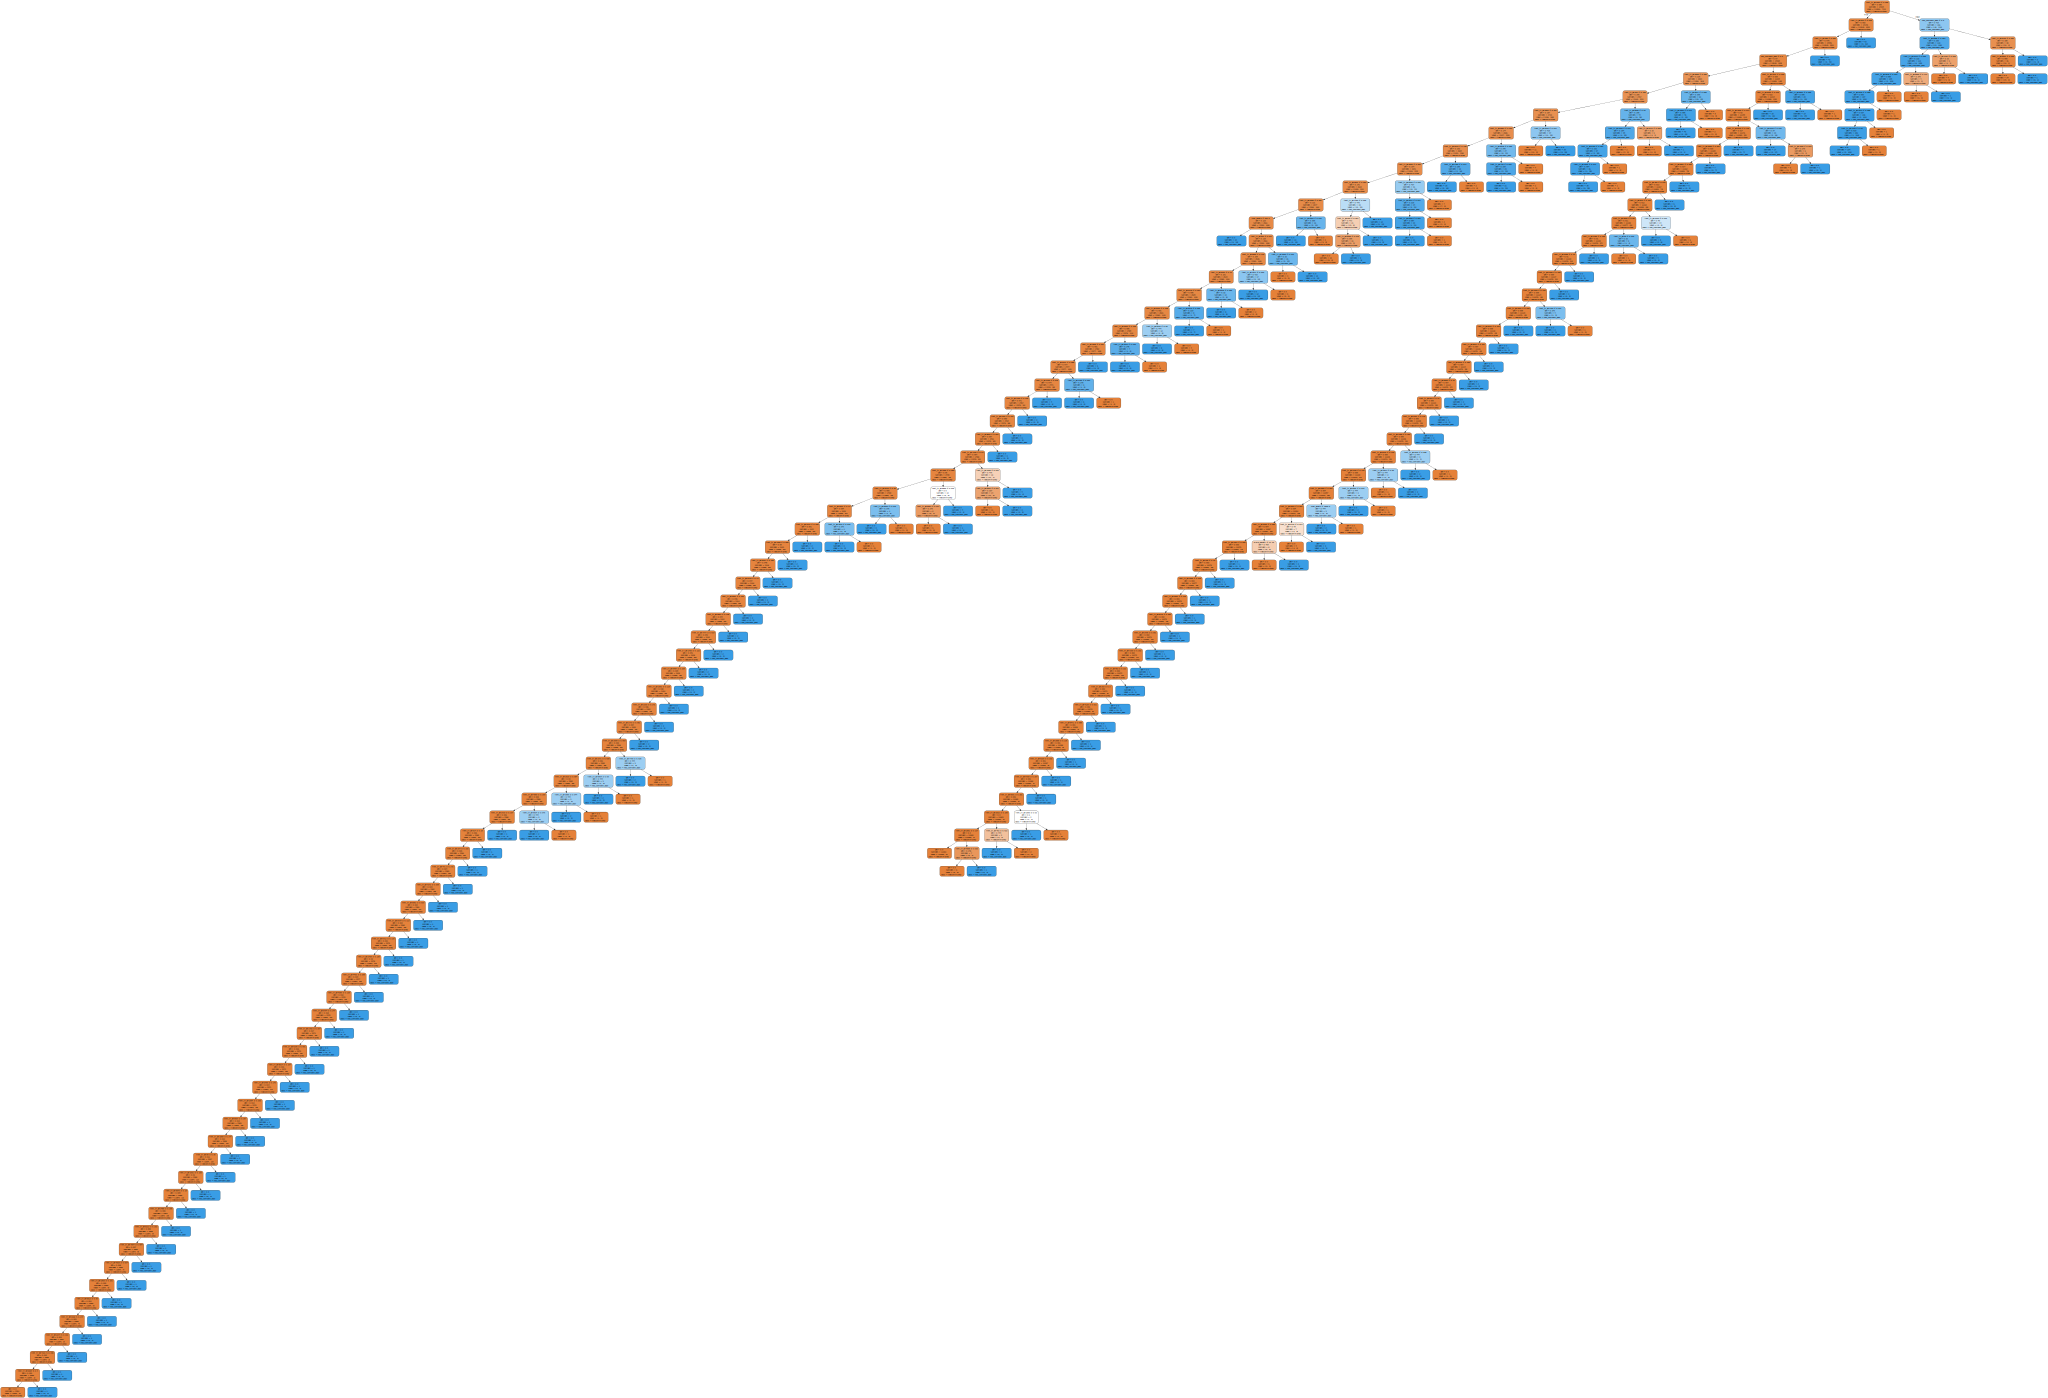

In [71]:
dot_data =export_graphviz(d, out_file=None, 
                      feature_names=x.columns,  
                      class_names=x.columns,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


In [72]:
d=Decision_tree_.fit(X_train_scaled,y_train)



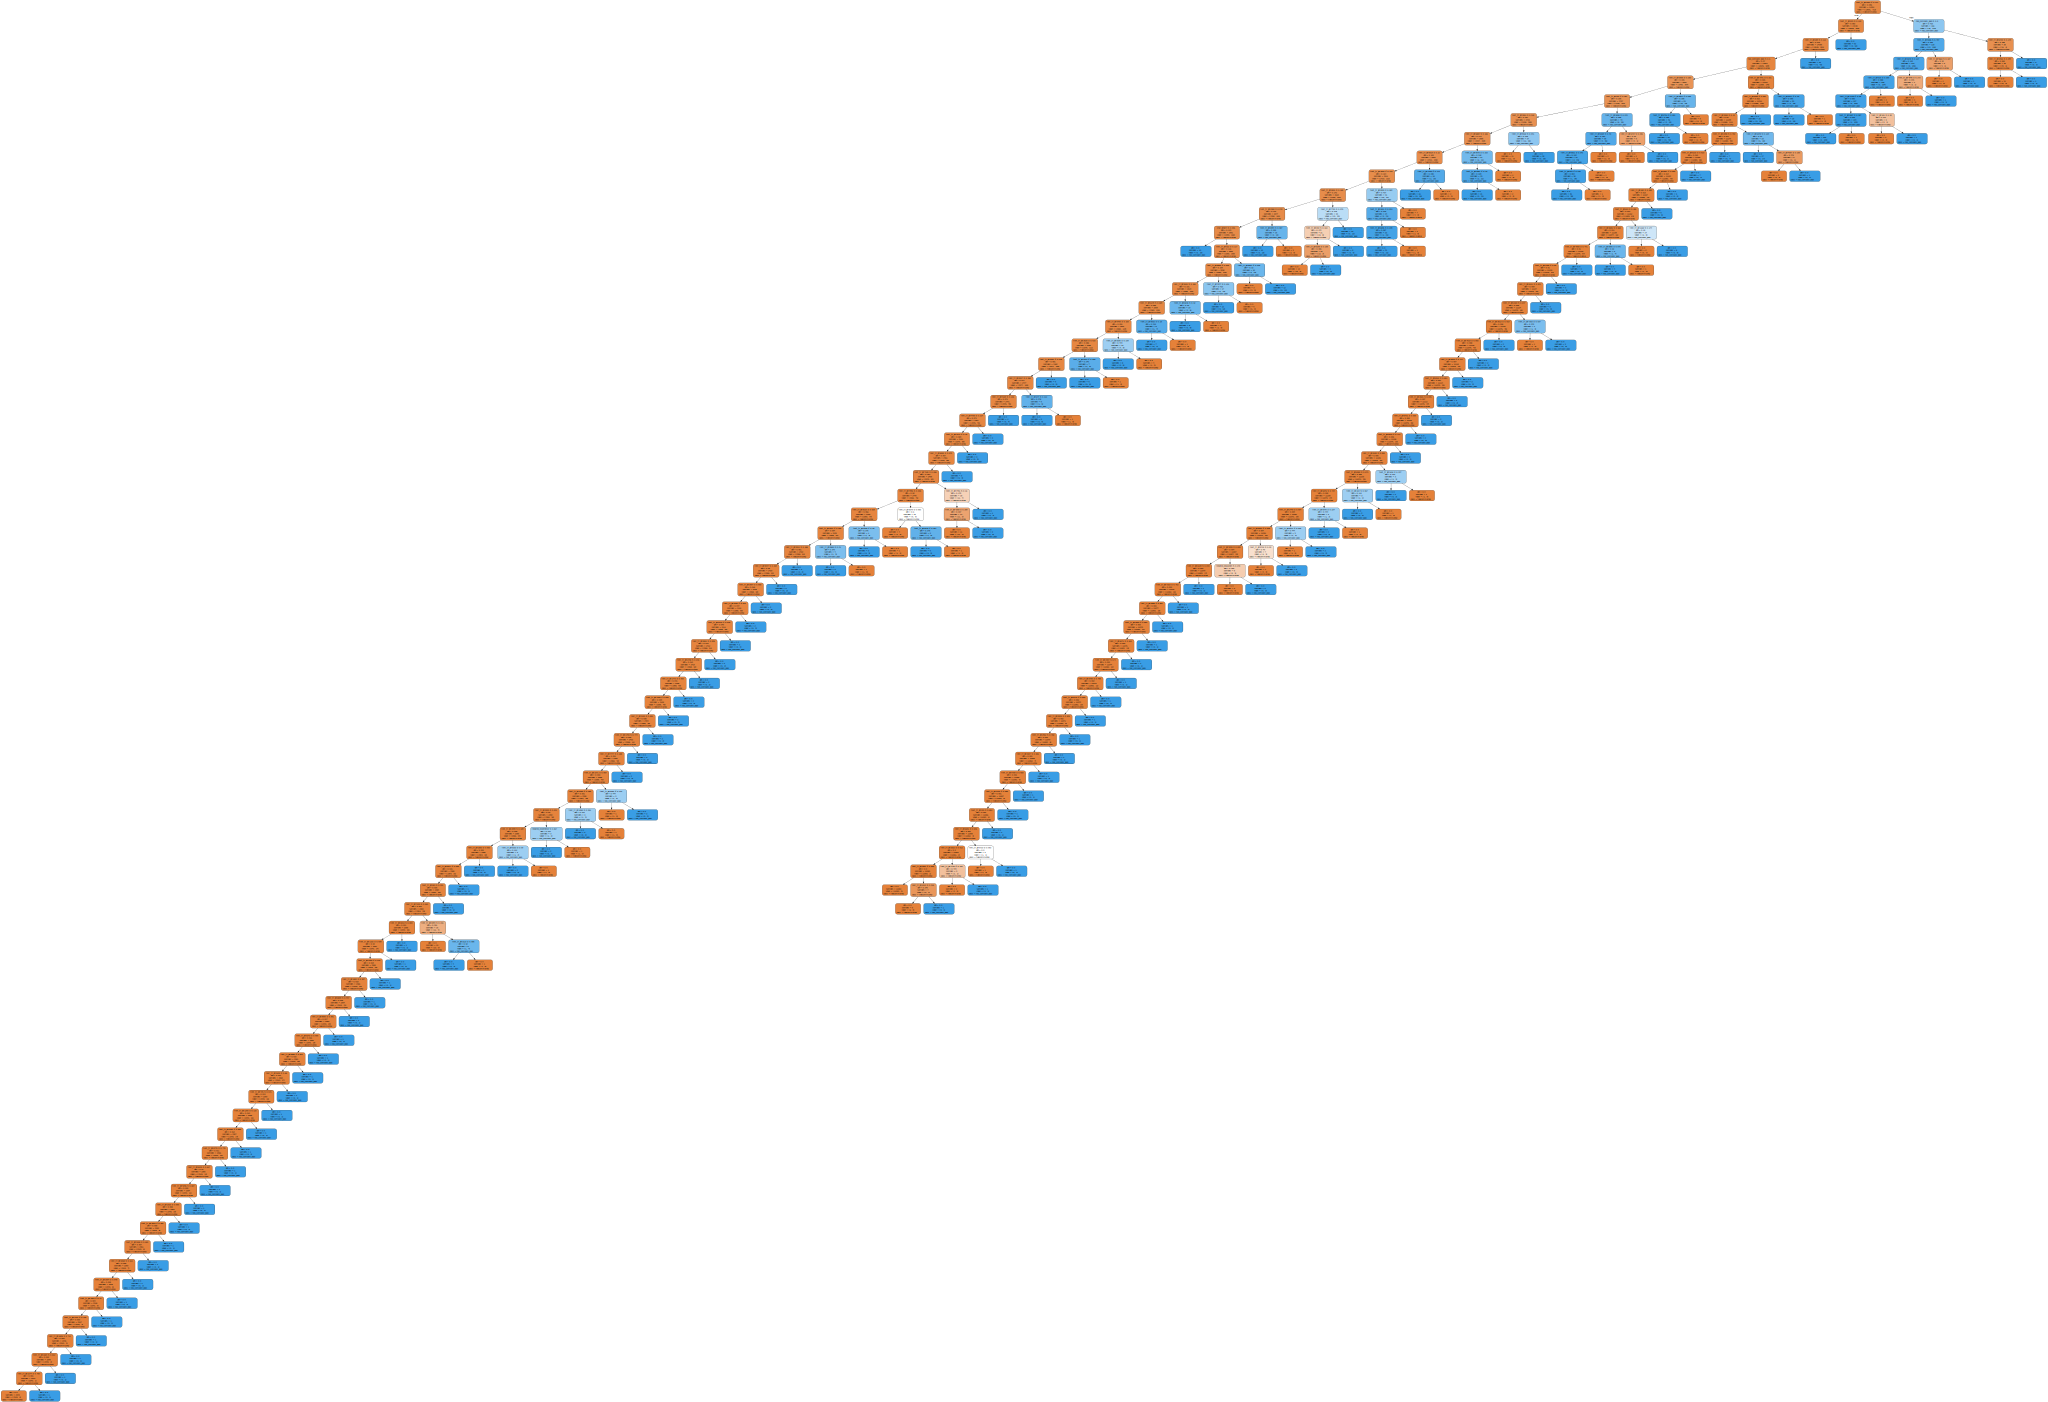

In [74]:
dot_data =export_graphviz(d, out_file=None, 
                      feature_names=x.columns,  
                      class_names=x.columns,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [75]:
predicted=train_test_(Decision_tree_,X_train,y_train,X_test,y_test)


In [76]:
print(predicted)

0.977069351230425


In [77]:
predicted_1=train_test_(Decision_tree_,X_train_scaled,y_train,X_test_scaled,y_test)


In [79]:
print(predicted_1)

0.9787472035794184


In [80]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
parameters={
            "criterion"         :['gini','entropy'],
            "min_samples_split" :[2,3,5]

           

}

In [85]:
grid_search_tree=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters,cv=5,verbose=1).fit(X_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 46.2min finished


In [87]:
grid_search_tree.best_params_

{'criterion': 'entropy', 'min_samples_split': 3}

In [93]:
Decision_tree_1=DecisionTreeClassifier(criterion='entropy',min_samples_split= 3)

predicted_tree=train_test_(Decision_tree_1,X_train_scaled,y_train,X_test_scaled,y_test)

In [60]:
Decision_tree_1.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [61]:
predicted_t=Decision_tree_1.predict(X_test_scaled)

In [64]:
print(classification_report(predicted_t,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.88      0.77      0.82       173

    accuracy                           0.98      3576
   macro avg       0.93      0.88      0.91      3576
weighted avg       0.98      0.98      0.98      3576



In [94]:
print(predicted_tree)

0.9784675615212528


# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
predicted_forest=train_test_(RandomForestClassifier(),X_train_scaled,y_train,X_test_scaled,y_test)
print(predicted_forest)

0.982662192393736


In [67]:
random_=RandomForestClassifier()

In [68]:
random_.fit(X_train_scaled,y_train)

C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
predicted_R=random_.predict(X_test_scaled)

In [72]:
print(classification_report(predicted_R,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3466
           1       0.68      0.95      0.79       110

    accuracy                           0.98      3576
   macro avg       0.84      0.97      0.89      3576
weighted avg       0.99      0.98      0.99      3576



# XGboost


In [33]:
from xgboost import XGBClassifier

In [34]:
predicted_xg_=train_test_(XGBClassifier(),X_train_scaled,y_train,X_test_scaled,y_test)

In [73]:
xgb_=XGBClassifier()

In [74]:
xgb_.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
predicted_xgb=xgb_.predict(X_test_scaled)

In [76]:
print(classification_report(predicted_xgb,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3443
           1       0.86      0.98      0.92       133

    accuracy                           0.99      3576
   macro avg       0.93      0.99      0.96      3576
weighted avg       0.99      0.99      0.99      3576



In [35]:
print(predicted_xg_)

0.9932885906040269


# SVM

In [37]:
from sklearn import svm

In [39]:
predicted=train_test_(svm.SVC(),X_train_scaled,y_train,X_test_scaled,y_test)

C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [77]:
svm_=svm.SVC()

In [78]:
svm_.fit(X_train_scaled,y_train)
predicted_s=svm_.predict(X_test_scaled)

C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [79]:
print(classification_report(predicted_s,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3576
           1       0.00      0.00      0.00         0

    accuracy                           0.96      3576
   macro avg       0.50      0.48      0.49      3576
weighted avg       1.00      0.96      0.98      3576



C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [40]:
print(predicted)

0.9572147651006712


# NaiveBayes


In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
predicted_navie=train_test_(GaussianNB(),X_train_scaled,y_train,X_test_scaled,y_test)

In [80]:
gaussian=GaussianNB()
gaussian.fit(X_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [84]:
predicted_g=gaussian.predict(X_test_scaled)

In [85]:
print(classification_report(predicted_g,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3401
           1       0.67      0.58      0.62       175

    accuracy                           0.97      3576
   macro avg       0.82      0.78      0.80      3576
weighted avg       0.96      0.97      0.96      3576



In [51]:
print(predicted_navie)

0.9653243847874721


# Adaboost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
predicted=train_test_(AdaBoostClassifier(),X_train_scaled,y_train,X_test_scaled,y_test)

In [86]:
ada=AdaBoostClassifier()

In [87]:
ada.fit(X_train_scaled,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [88]:
predicted_a=ada.predict(X_test_scaled)

print(classification_report(predicted_a,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3444
           1       0.74      0.86      0.79       132

    accuracy                           0.98      3576
   macro avg       0.87      0.92      0.89      3576
weighted avg       0.99      0.98      0.98      3576



In [54]:
print(predicted)

0.9835011185682326


# LGBM

In [55]:
from lightgbm import LGBMClassifier

In [56]:
predicted=train_test_(LGBMClassifier(),X_train_scaled,y_train,X_test_scaled,y_test)

In [89]:
lgbm=LGBMClassifier()

In [90]:
lgbm.fit(X_train_scaled,y_train)



LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [91]:
predicted_lgbm=lgbm.predict(X_test_scaled)

In [94]:
print(classification_report(predicted_lgbm,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3446
           1       0.84      0.99      0.91       130

    accuracy                           0.99      3576
   macro avg       0.92      0.99      0.95      3576
weighted avg       0.99      0.99      0.99      3576



In [57]:
print(predicted)

0.9930089485458613


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Voting classifier

In [95]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

In [102]:
voting_classifier=Pipeline([['model_V',VotingClassifier(estimators=[('logisitic_regression',LogisticRegression(C=10,penalty='l2')),('Decision_tree',Decision_tree_1),('Random_Forest',random_),('XG',xgb_),('svm',svm_),('naive_',gaussian),('ada',ada),('LGBM',lgbm)])]])

In [104]:
voting_classifier.fit(X_train_scaled,y_train)

C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[['model_V',
                 VotingClassifier(estimators=[('logisitic_regression',
                                               LogisticRegression(C=10,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=100,
                                                                  multi_class='warn',
                                                                  n_jobs=None,
                                                                  penalty='l2',
                                                                 

In [105]:
predict_voting=voting_classifier.predict(X_test_scaled)

In [107]:
print(classification_report(predict_voting,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3462
           1       0.75      1.00      0.85       114

    accuracy                           0.99      3576
   macro avg       0.87      0.99      0.92      3576
weighted avg       0.99      0.99      0.99      3576



In [112]:
t=(predict_voting==y_test)

In [113]:
print(t.mean())

0.9890939597315436
